#### MNIST Introduction
- MNIST (Mixed National Institute of Standards and Technology database)
- **손글씨 숫자(0~9) 이미지 데이터**
- 각 이미지는 **가로와 세로가 각각 28px, 흑백 이미지**로 만들어져 있음
- Training data == 55,000장, Validation data == 5,000장, Test data = 10,000장

----

### 1. Prepare the data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from tensorflow.keras import datasets

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [14]:
# training data == 60000/ test data == 10000, each data=28x28

print(train_data.shape) 
print(test_data.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
import pandas as pd

pd.DataFrame(train_data[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


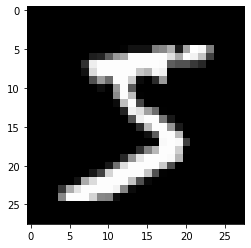

In [18]:
plt.imshow(train_data[0], cmap='gray')
plt.show()

---

### Normalization

In [19]:
## 각 이미지는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max())

0
255


In [21]:
# 각 이미지를 (28 x 28)에서 (1 x 784)로 펼쳐줍니다.
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 28*28) / 255.0
test_data = test_data.reshape(10000, 28*28) / 255.0

In [22]:
test_data.shape

(10000, 784)

---

### One-hot Encoding

In [23]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
## 각 label을 integer value에서 one-hot vector로 변경해줍니다.

from tensorflow.keras import utils

train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

In [27]:
train_label.shape

(60000, 10)

In [28]:
## 잘 바뀌었는지 확인

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


---

### 2. Build the model

In [62]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
tf.logging.set_verbosity(tf.logging.ERROR)

In [63]:
# 데이터가 흘러들어올 접시 (placeholder) 만들기

X = tf.placeholder(tf.float32, [None, 28*28])
Y = tf.placeholder(tf.float32, [None, 10])

In [64]:
# Dropout을 적용하며 layer마다 살려줄 node의 비율을 지정합니다.
# 이 때에도 placeholder를 사용해야 합니다.

keep_prob = tf.placeholder(tf.float32)

In [65]:
## 모든 parameter Theta 는 Variable로 선언

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

L1 = tf.nn.dropout(L1, keep_prob)

In [66]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

L2 = tf.nn.dropout(L2, keep_prob)

In [67]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3) # 마지막 layer는 행렬곱까지만 진행

---

### 3. Set the criterion

In [68]:
cost = tf.losses.softmax_cross_entropy(Y, model)
# for Classification 'cross-entropy' after 'softmax'

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# Select optimizer & connect with cost function 

---

### 4. Train the model

In [69]:
init = tf.global_variables_initializer()
# Initialize all global variables (parameter Theta)
sess = tf.Session()
sess.run(init)

In [70]:
batch_size = 100
total_batch = int(len(train_data) / batch_size)
print(total_batch)

600


In [71]:
## epoch가 15인 경우 (N / batch_size) * epoch => n_parameter update

In [72]:
for epoch in range(15): # iterate over of epoch
    
    total_cost = 0 # epoch마다 평균 에러값 계산
    batch_idx = 0 # 매 batch 마다 꺼낼 데이터의 시작 index 값 지정
    
    for i in range(total_batch): # iterate over of batch
        
        batch_x = train_data[batch_idx: batch_idx + batch_size]
        batch_y = train_label[batch_idx: batch_idx + batch_size]
        
        sess.run(optimizer, feed_dict={X: batch_x, 
                                       Y: batch_y, 
                                       keep_prob: 0.8})
        
        batch_cost = sess.run(cost, feed_dict={X: batch_x, 
                                               Y: batch_y, 
                                               keep_prob: 0.8})
        total_cost = total_cost + batch_cost
        
        batch_idx += batch_size
        
    training_cost = total_cost / total_batch
    training_cost = total_cost / total_batch
    
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.406
Epoch: 2 || Avg. Training cost = 0.153
Epoch: 3 || Avg. Training cost = 0.105
Epoch: 4 || Avg. Training cost = 0.077
Epoch: 5 || Avg. Training cost = 0.063
Epoch: 6 || Avg. Training cost = 0.052
Epoch: 7 || Avg. Training cost = 0.044
Epoch: 8 || Avg. Training cost = 0.039
Epoch: 9 || Avg. Training cost = 0.035
Epoch: 10 || Avg. Training cost = 0.032
Epoch: 11 || Avg. Training cost = 0.028
Epoch: 12 || Avg. Training cost = 0.026
Epoch: 13 || Avg. Training cost = 0.026
Epoch: 14 || Avg. Training cost = 0.025
Epoch: 15 || Avg. Training cost = 0.021
Learning process is completed!


---

### 5. Test the model

In [41]:
test_data[0:1, :].shape

(1, 784)

In [42]:
sess.run(model, feed_dict={X: test_data[0:1, :]})

array([[-12.25907   ,  -7.9946012 ,  -7.200391  ,  -8.420187  ,
        -14.376212  , -14.618101  , -40.094177  ,  20.363678  ,
        -14.092697  ,  -0.83680975]], dtype=float32)

In [43]:
prediction = sess.run(tf.nn.softmax(model), feed_dict={X: test_data[0:1, :]})

pd.DataFrame(prediction)

,0,1,2,3,4,5,6,7,8,9
0,6.793913e-15,4.832317e-13,1.069245e-12,3.157376e-13,8.178186e-16,6.421042e-16,5.539711e-27,1.0,1.085891e-15,6.205052e-10


In [44]:
sess.run(tf.argmax(model, axis=1), feed_dict={X: test_data[0:1, :]})

array([7])

In [45]:
np.argmax(test_label[0:1, :], axis=1)

array([7])

In [46]:

sess.run(tf.argmax(Y, 1), feed_dict={Y: test_label[0:1, :]})

array([7])

---

### 정확도 계산 (tf.argmax/ equal/ cast/ reduce_mean 활용)  

In [74]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [75]:
print('정확도:', sess.run(accuracy,
                        feed_dict={X: test_data,
                                   Y: test_label,
                                   keep_prob: 1}))

정확도: 0.9816


In [53]:
prediction = sess.run(tf.argmax(model, axis=1), feed_dict={X: test_data})
pd.DataFrame(prediction)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [55]:
## 모델 예측 결과값

predicted_labels = sess.run(tf.argmax(model, 1), feed_dict={X: test_data})

print(list(predicted_labels)[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [56]:
print(np.argmax(test_label, 1)[:10])

[7 2 1 0 4 1 4 9 5 9]
